In [1]:
import pandas as pd
import numpy as np
import bisect
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

from tqdm import tqdm
from scipy import stats
from sklearn.preprocessing import LabelEncoder

| 항목 | 설명     |
|-----|----------|
| X1  | 작업번호 |
| X2  | 마킹길이 |
| X3  | 절단길이 |
| X4  | 철판두께 |
| X5  | 철판재질 |
| X6  | 절단갯수 |
| X7  | 작업장   |
| X8  | 작업자   |
| Y1  | 마킹시간 |
| Y2  | 절단시간 |


In [2]:
train = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\HD_CNC\train.csv')
test = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\HD_CNC\test.csv')

display(train.head())
display(test.head())

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,134764,56.3,67.5,22.5,AH32,4,97,PL973,467,2241
1,9854,115.0,67.0,13.0,AH32,2,27,PL271,1058,1163
2,94365,59.2,44.6,18.0,AH32-TM,1,14,PL141,270,1094
3,110641,52.1,97.4,15.0,A,17,24,PL242,391,2604
4,100159,42.9,58.7,14.5,A,4,23,PL233,232,1564


,Id,X1,X2,X3,X4,X5,X6,X7,X8
0,0,158065,80.6,104.8,11.0,A,29,23,PL234
1,1,65927,141.8,34.2,17.5,A,2,91,PL911
2,2,117029,77.2,103.3,17.0,A,10,97,PL973
3,3,50866,95.5,131.0,18.0,A,2,23,PL234
4,4,151900,91.7,36.1,19.0,AH32,1,27,PL271


In [3]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121754 entries, 0 to 121753
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      121754 non-null  int64  
 1   X2      121754 non-null  float64
 2   X3      121754 non-null  float64
 3   X4      121754 non-null  float64
 4   X5      121754 non-null  object 
 5   X6      121754 non-null  int64  
 6   X7      121754 non-null  int64  
 7   X8      121754 non-null  object 
 8   Y1      121754 non-null  int64  
 9   Y2      121754 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 9.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40571 entries, 0 to 40570
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      40571 non-null  int64  
 1   X1      40571 non-null  int64  
 2   X2      40571 non-null  float64
 3   X3      40571 non-null  float64
 4   X4      40571 non-null  float64
 5   X5      40571 non-null  object 
 6   X6      40571 non-null  int64  
 7   X7      40571 non-null  int64  
 8   X8      40571 non-null  object 
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


None

In [4]:
test.drop(columns = ['Id'], inplace = True)

In [5]:
categorical_features = ['X5', 'X8']
encoders = {}

for feature in tqdm(categorical_features, desc="Encoding features"):
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature].astype(str))
    le_classes_set = set(le.classes_)
    test[feature] = test[feature].map(lambda s: '-1' if s not in le_classes_set else s)
    le_classes = le.classes_.tolist()
    bisect.insort_left(le_classes, '-1')
    le.classes_ = np.array(le_classes)
    test[feature] = le.transform(test[feature].astype(str))
    encoders[feature] = le

Encoding features: 100%|██████████| 2/2 [00:00<00:00, 21.68it/s]


<Axes: >

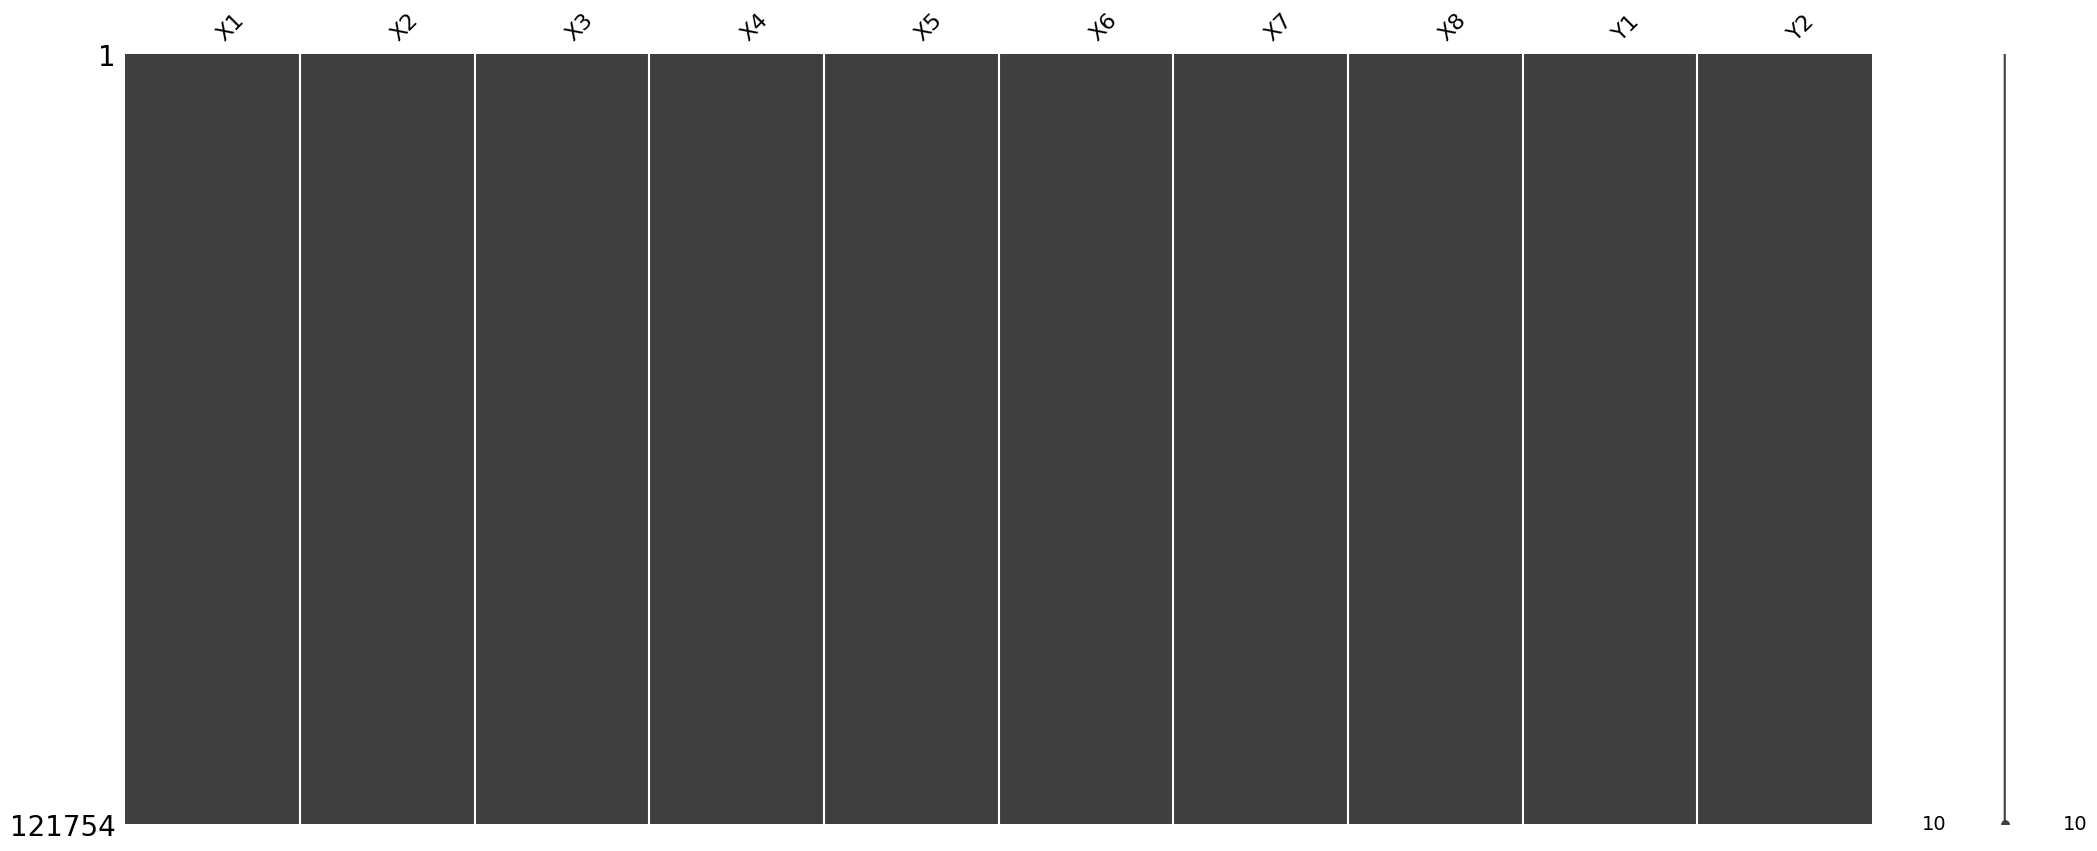

In [6]:
ms.matrix(train)

<Axes: >

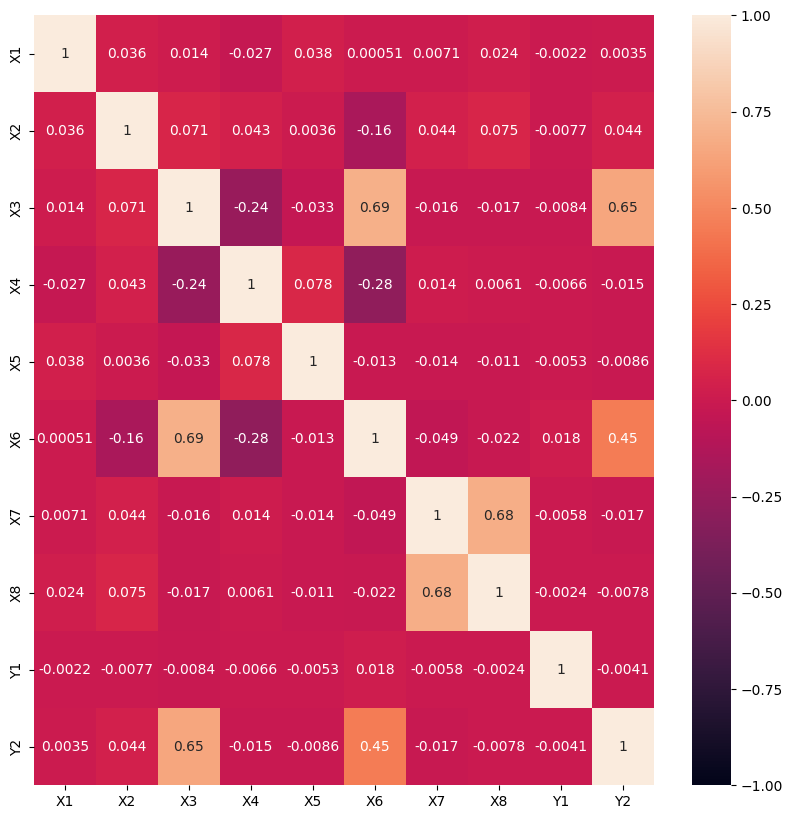

In [7]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), vmax = 1, vmin = -1, annot = True)

In [8]:
# sns.pairplot(train)

<Figure size 1500x500 with 0 Axes>

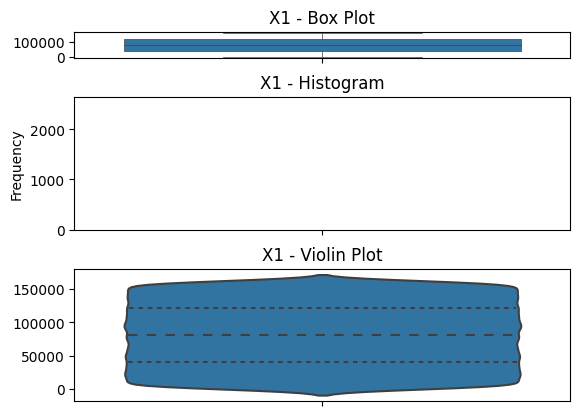

<Figure size 1500x500 with 0 Axes>

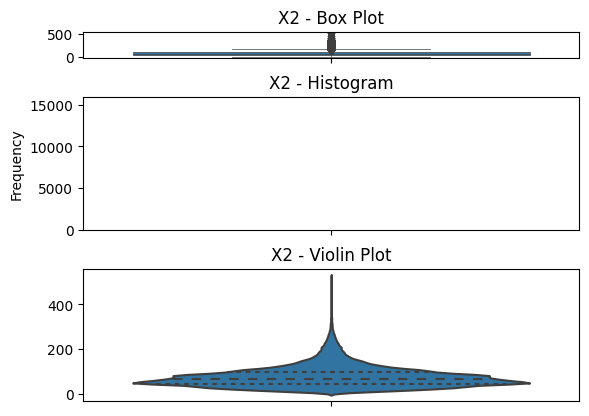

<Figure size 1500x500 with 0 Axes>

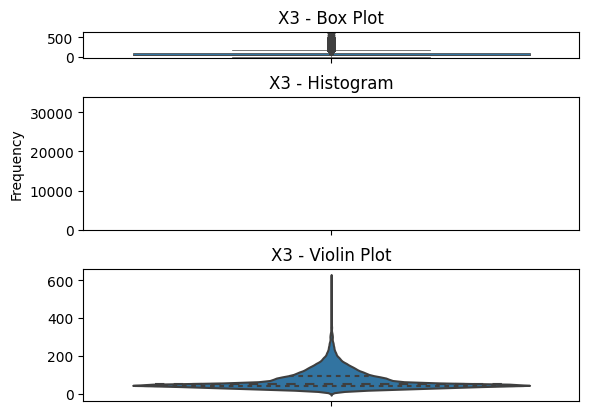

<Figure size 1500x500 with 0 Axes>

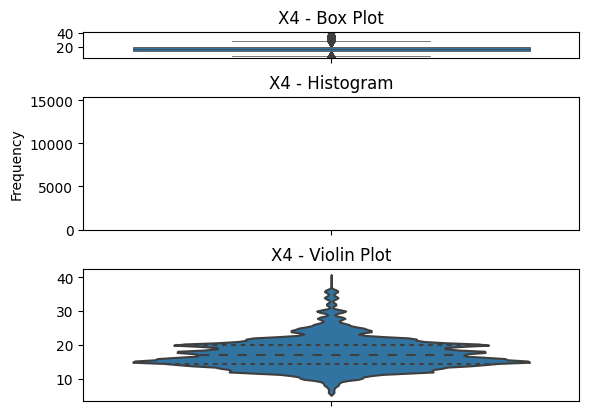

<Figure size 1500x500 with 0 Axes>

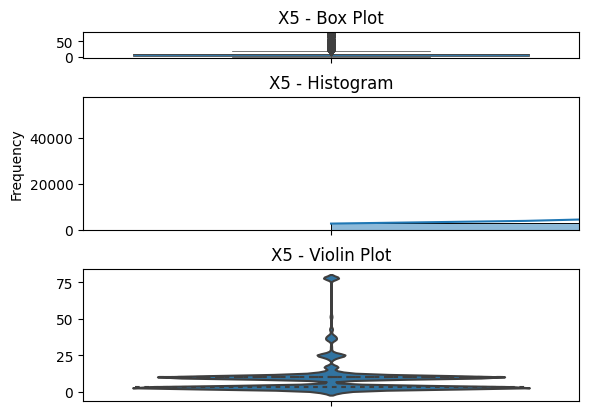

<Figure size 1500x500 with 0 Axes>

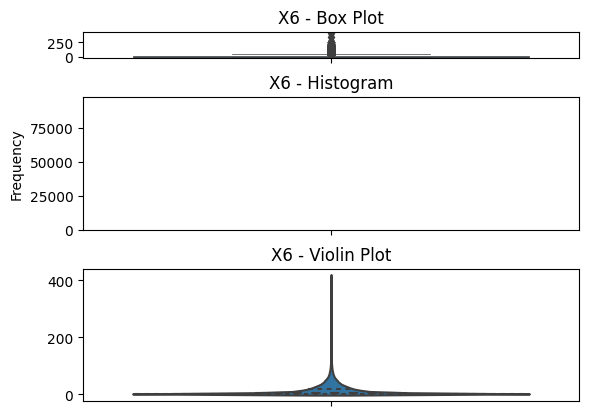

<Figure size 1500x500 with 0 Axes>

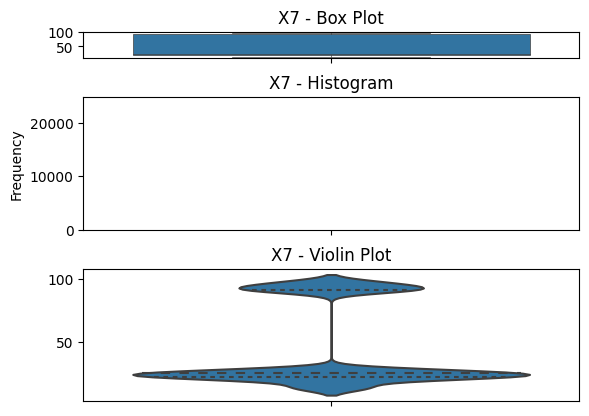

<Figure size 1500x500 with 0 Axes>

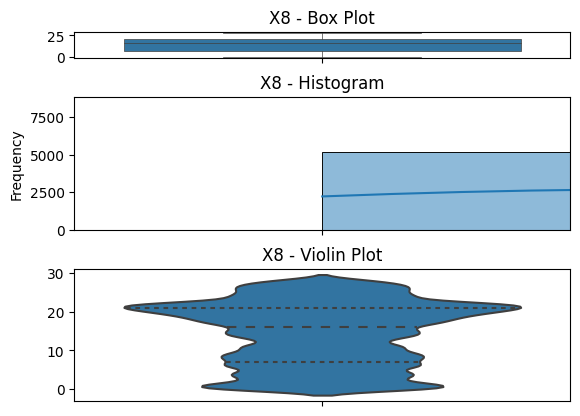

<Figure size 1500x500 with 0 Axes>

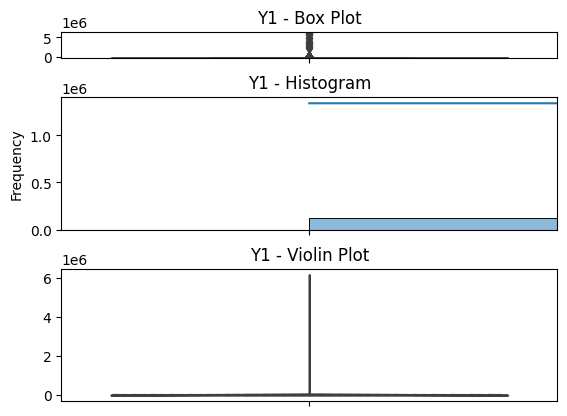

<Figure size 1500x500 with 0 Axes>

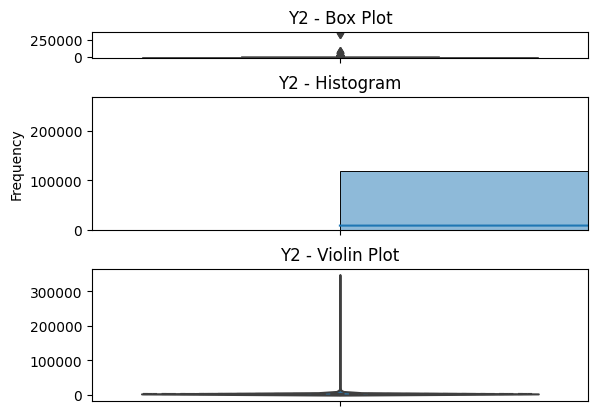

In [9]:
features = train.columns
numeric_features = train.select_dtypes('number').columns

for i in numeric_features:
    plt.figure(figsize=(15, 5))
    plt.tight_layout()

    f, (ax_box, ax_hist, ax_violin) = plt.subplots(3, sharex=True, gridspec_kw={'height_ratios': (0.2, 1, 1)})

    sns.boxplot(train[i], ax=ax_box, linewidth=0.5)

    sns.histplot(train[i], ax=ax_hist, bins=50, kde=True)
    ax_hist.set_title(f'{i} - Histogram', fontsize=12) 

    sns.violinplot(data=train, y=i, ax=ax_violin, inner='quartile')

    ax_violin.set_xlabel('')

    ax_box.set_title(f'{i} - Box Plot', fontsize=12)
    ax_violin.set_title(f'{i} - Violin Plot', fontsize=12)

    ax_box.set_xlabel('')

    ax_violin.set_ylabel('')
    ax_hist.set_ylabel('Frequency') 

    ax_violin.yaxis.label.set_size(10)

    plt.subplots_adjust(hspace=0.4)

numeric cols : 10
Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


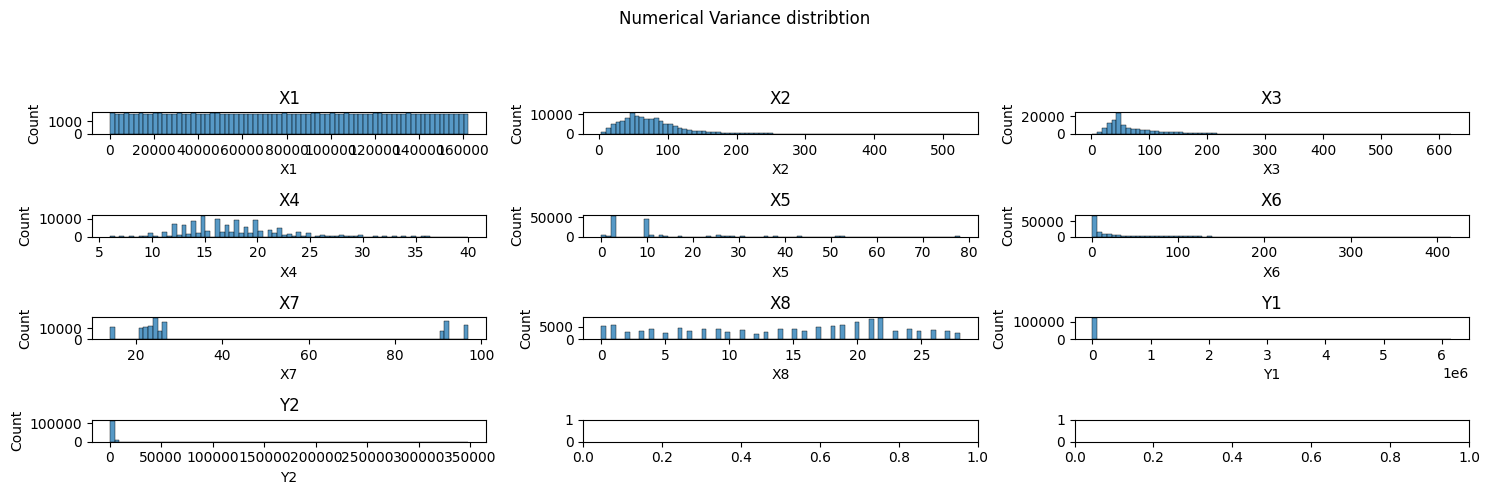

In [10]:
print(f'numeric cols : {len(numeric_features)}')
print(f'{numeric_features}')

fig, ax = plt.subplots(4, 3, figsize=(15, 5))

for i in range(len(numeric_features)):

    x = i // 3    
    y = i % 3
    
    sns.histplot(x=numeric_features[i], data = train, bins = 75, ax = ax[x,y])
    ax[x, y].set_title(numeric_features[i])

plt.suptitle('Numerical Variance distribtion\n\n')
plt.tight_layout()

In [11]:
drop_indices = train[(train['Y1'] >= 2500) |
                     (train['Y2'] >= 20000) |
                     (train['X2'] >= 500) |
                     (train['X4'] > 40) |
                     (train['X6'] >= 265)].index

train = train.drop(drop_indices)
train = train[(train['Y1'] > 150) & (train['Y1'] <= 67000) & (train['Y2'] > 150) & (train['Y2'] <= 67000)]

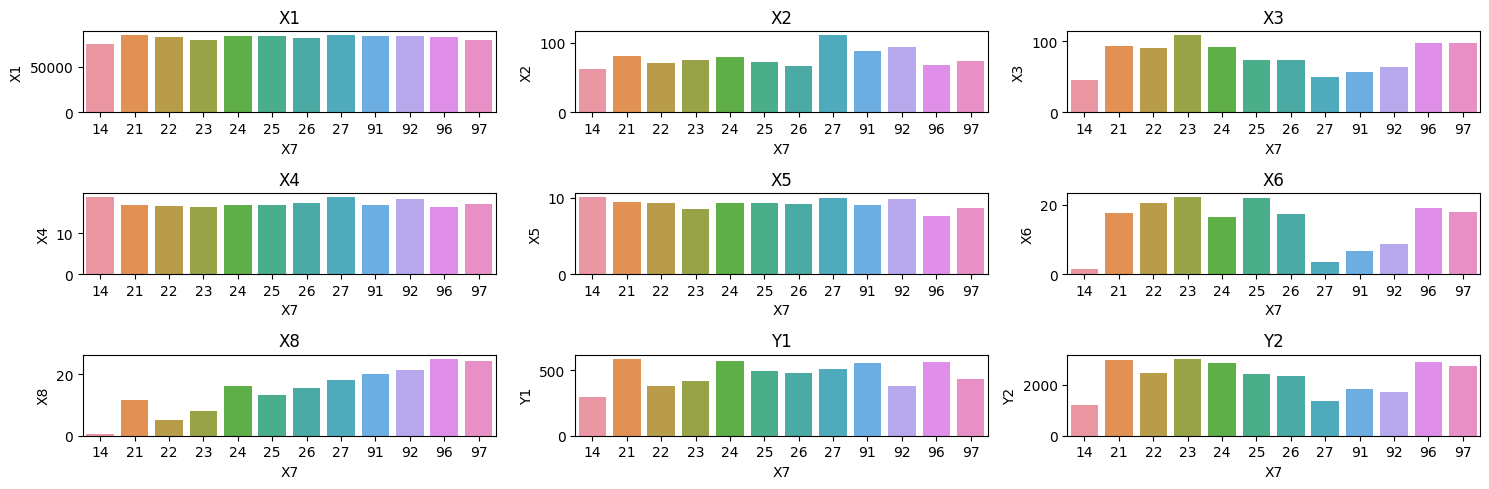

In [12]:
data = train.groupby('X7').mean().reset_index()

fig, axes = plt.subplots(3, 3, figsize=(15, 5))

sns.barplot(x = 'X7', y = 'X1', data = data, ax = axes[0, 0])
axes[0, 0].set_title('X1')

sns.barplot(x = 'X7', y = 'X2', data = data, ax = axes[0, 1])
axes[0, 1].set_title('X2')

sns.barplot(x = 'X7', y = 'X3', data = data, ax = axes[0, 2])
axes[0, 2].set_title('X3')

sns.barplot(x = 'X7', y = 'X4', data = data, ax = axes[1, 0])
axes[1, 0].set_title('X4')

sns.barplot(x = 'X7', y = 'X5', data = data, ax = axes[1, 1])
axes[1, 1].set_title('X5')

sns.barplot(x = 'X7', y = 'X6', data = data, ax = axes[1, 2])
axes[1, 2].set_title('X6')

sns.barplot(x = 'X7', y = 'X8', data= data, ax= axes[2, 0])
axes[2, 0].set_title('X8')

sns.barplot(x = 'X7', y = 'Y1', data = data, ax = axes[2, 1])
axes[2, 1].set_title('Y1')

sns.barplot(x = 'X7', y = 'Y2', data = data, ax = axes[2, 2])
axes[2, 2].set_title('Y2')

plt.tight_layout()

In [13]:
mmtime = train.groupby('X5')['Y1'].mean()
mctime = train.groupby('X5')['Y2'].mean()

wmtime = train.groupby('X7')['Y1'].mean()
wctime = train.groupby('X7')['Y2'].mean()

manmtime = train.groupby('X8')['Y1'].mean()
manctime = train.groupby('X8')['Y2'].mean()

train['X5_mmtime'] = train['X5'].map(mmtime)
train['X5_mctime'] = train['X5'].map(mctime)

train['X7_wmtime'] = train['X7'].map(wmtime)
train['X7_wctime'] = train['X7'].map(wctime)

train['X8_manmtime'] = train['X8'].map(manmtime)
train['X8_manctime'] = train['X8'].map(manctime)

test['X5_mmtime'] = test['X5'].map(mmtime)
test['X5_mctime'] = test['X5'].map(mctime)

test['X7_wmtime'] = test['X7'].map(wmtime)
test['X7_wctime'] = test['X7'].map(wctime)

test['X8_manmtime'] = test['X8'].map(manmtime)
test['X8_manctime'] = test['X8'].map(manctime)

train['Velo_cutting'] = train['X3'] / train['X4']
train['Velo_marking'] = train['X2'] / train['X4']

test['Velo_cutting'] = test['X3'] / test['X4']
test['Velo_marking'] = test['X2'] / test['X4']

train['Feed_cutting'] = train['Velo_cutting'] * train['X6']
train['Feed_marking'] = train['Velo_marking'] * train['X6']

test['Feed_cutting'] = test['Velo_cutting'] * test['X6']
test['Feed_marking'] = test['Velo_marking'] * test['X6']

<Axes: xlabel='X2', ylabel='X3'>

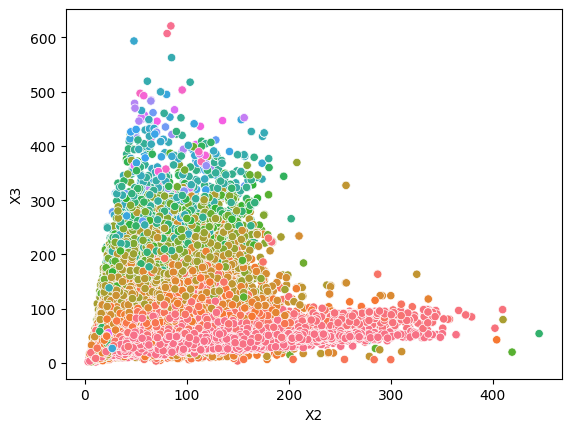

In [14]:
sns.scatterplot(x = train['X2'], y = train['X3'], hue = train['X6'].astype('category'), legend = None)

<Axes: xlabel='X2', ylabel='X3'>

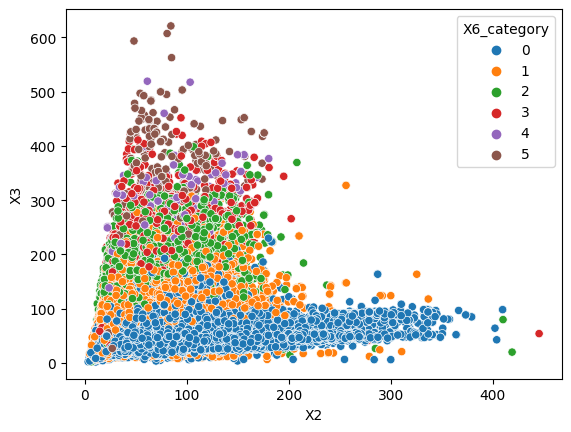

In [15]:
bins = [0, 15, 40, 70, 95, 110, float('inf')]

labels = [0, 1, 2, 3, 4, 5]

train['X6_category'] = pd.cut(train['X6'], bins = bins, labels = labels, include_lowest = True)
test['X6_category'] = pd.cut(test['X6'], bins = bins, labels = labels, include_lowest = True)

train.drop(columns = ['X6'], inplace = True)
test.drop(columns = ['X6'], inplace = True)

sns.scatterplot(x=train['X2'], y=train['X3'], hue = train['X6_category'].astype('category'))

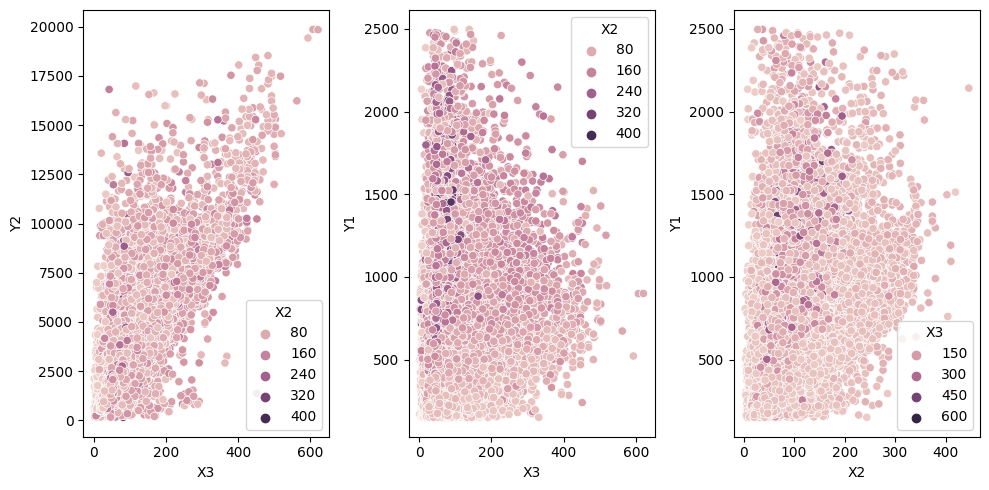

In [16]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x = 'X3', y = 'Y2', hue = 'X2', data = train)

plt.subplot(1, 3, 2)
sns.scatterplot(x = 'X3', y = 'Y1', hue = 'X2', data = train)

plt.subplot(1, 3, 3)
sns.scatterplot(x = 'X2', y = 'Y1', hue = 'X3', data = train)

plt.tight_layout()
plt.show()

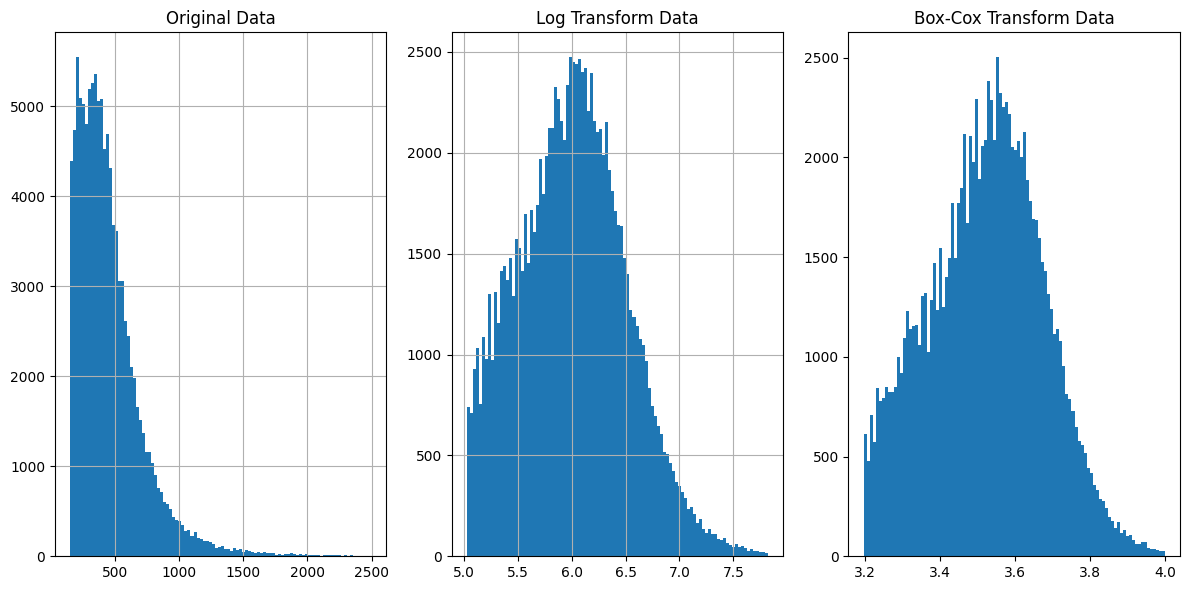

In [17]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 3, 1)
train['Y1'].hist(bins = 100)
plt.title('Original Data')

plt.subplot(1, 3, 2)
np.log1p(train['Y1']).hist(bins = 100)
plt.title('Log Transform Data')

plt.subplot(1, 3, 3)
transformed_data, _ = stats.boxcox(train['Y1'] + 1)
plt.hist(transformed_data, bins = 100)
plt.title('Box-Cox Transform Data')

plt.tight_layout()
plt.show()

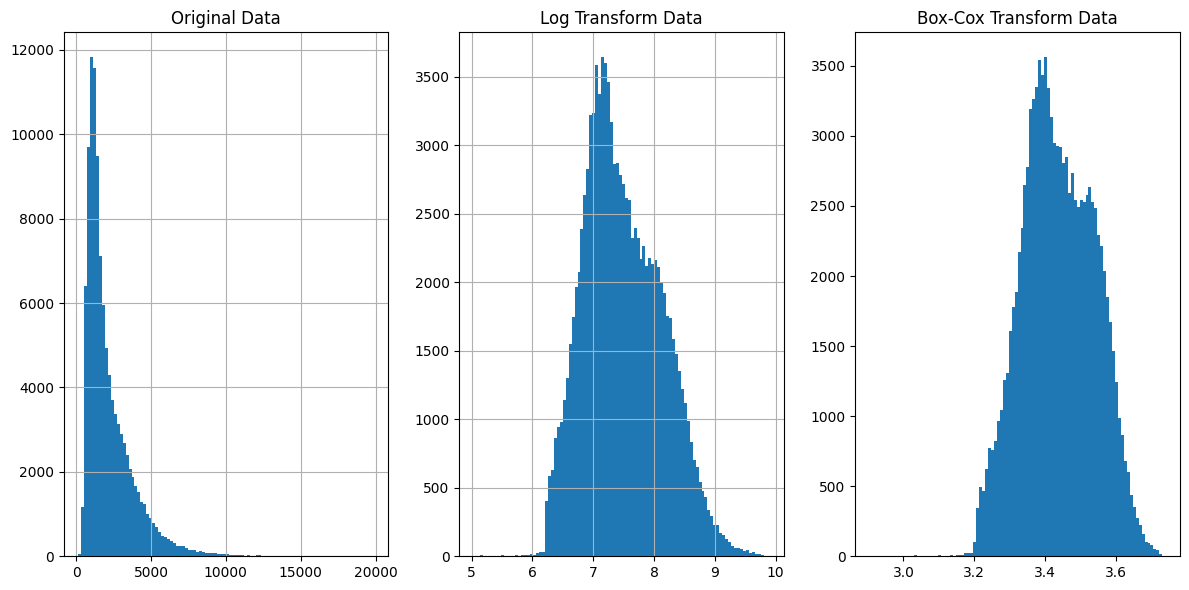

In [18]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 3, 1)
train['Y2'].hist(bins = 100)
plt.title('Original Data')

plt.subplot(1, 3, 2)
np.log1p(train['Y2']).hist(bins = 100)
plt.title('Log Transform Data')

plt.subplot(1, 3, 3)
transformed_data, _ = stats.boxcox(train['Y2'] + 1)
plt.hist(transformed_data, bins = 100)
plt.title('Box-Cox Transform Data')

plt.tight_layout()
plt.show()

<Axes: >

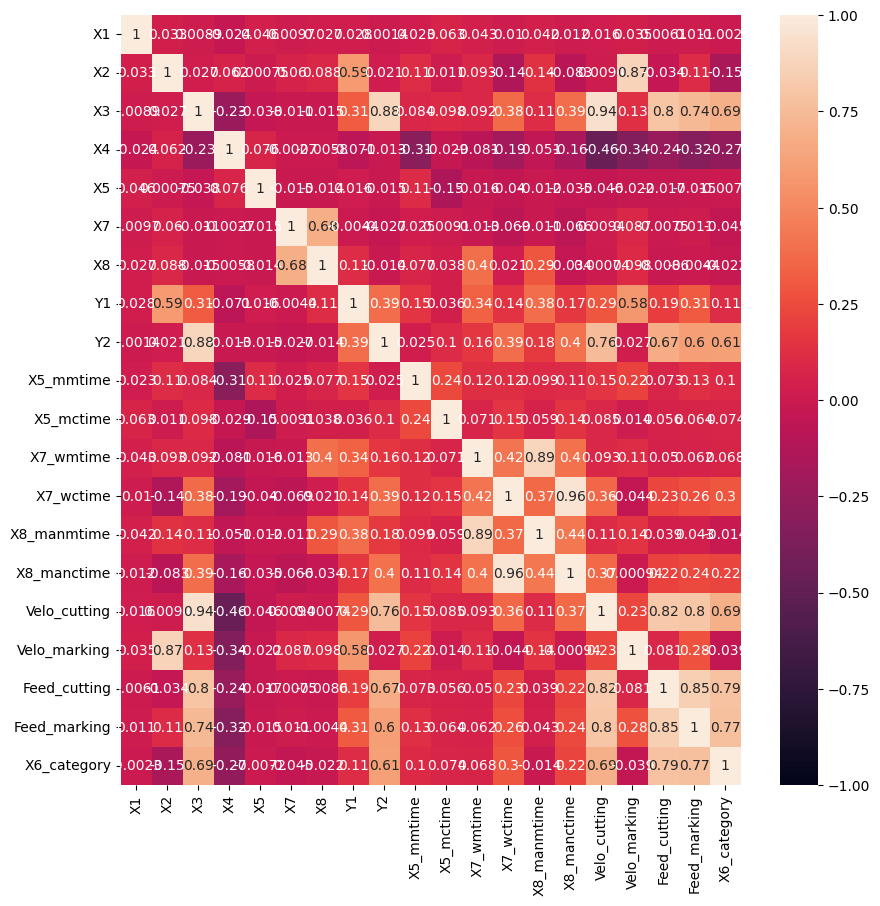

In [19]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), vmax = 1, vmin = -1, annot = True)